In [ ]:
import tensorflow as tf

In [ ]:
#Loading the dataset

mnist = tf.keras.datasets.mnist
print(mnist)

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>


In [ ]:
#After loading MNIST data,divide into train and test.

(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

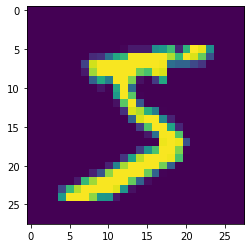

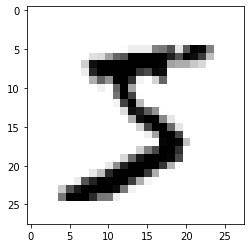

In [ ]:
#Just check how the data looks like
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()


#Check whether it is color image or binary image and plot the congfig.
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [ ]:
#Checking the values of each pixel before normalization

print(x_train[0])##Before Normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

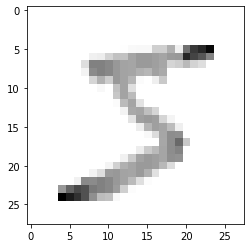

In [ ]:
#As images are in single color which is Gray(1==>0 to 255),not RGB

#Normalizing the Data | Preprocessing Step

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [ ]:
#After Normalization
#All the values should be 0 to 1
#So,All the values are normalized.

print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[0]) # Just check whether the labels are inside our netwok.

5


In [ ]:
# Resizing the image to make it apply for Convolutional operation
import numpy as np
IMG_SIZE=28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) # increasing one dimension for kernal/filter operation
x_testr =  np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1) # increasing one dimension for kernal/filter operation
print("The Training Sample Dimentions",x_trainr.shape)
print("The Testing Sample Dimentions",x_testr.shape)

The Training Sample Dimentions (60000, 28, 28, 1)
The Testing Sample Dimentions (10000, 28, 28, 1)


In [ ]:
# Create our MODEL or create a Deep Neural Network
#Training on 60000 MNIST Data

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D



In [ ]:
## Creating our model
model = Sequential()

###First Convolutional Layer
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:])) # For first Convolutional layer,we have to mention input layer size.
model.add(Activation("relu")) #Activation layer make it Non-linear, if <0-Remove, >0-Allow
model.add(MaxPooling2D(pool_size=(2,2)))# Maxpooling -Reduce the Half of the size.

###Second Convolutional Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

###Third Convolutional Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

###Fully Connected Layer 1
model.add(Flatten())#Before using fully connected layer,need to be faltten so that 2D to 1D.
model.add(Dense(64))
model.add(Activation("relu"))

###Fully Connected Layer 2
model.add(Dense(32))
model.add(Activation("relu"))

###Last Fully connected layer,output must be equal to your number of classes which is 0-9
model.add(Dense(10))
model.add(Activation('softmax')) ##Activation function is changed to softmax(Class Probabilities)





In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [ ]:
print("Total Training Sample",len(x_trainr))

Total Training Sample 60000


In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer= "adam",metrics=['accuracy'])

In [ ]:
model.fit(x_trainr,y_train,epochs=5, validation_split=0.2)#Training my model

Epoch 1/5
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0674 - accuracy: 0.9792 - val_loss: 0.0726 - val_accuracy: 0.9762
Epoch 2/5
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0543 - accuracy: 0.9829 - val_loss: 0.0608 - val_accuracy: 0.9819
Epoch 3/5
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0431 - accuracy: 0.9857 - val_loss: 0.0694 - val_accuracy: 0.9781
Epoch 4/5
1500/1500 [==============================] - 73s 49ms/step - loss: 0.0361 - accuracy: 0.9893 - val_loss: 0.0535 - val_accuracy: 0.9838
Epoch 5/5
1500/1500 [==============================] - 78s 52ms/step - loss: 0.0319 - accuracy: 0.9898 - val_loss: 0.0699 - val_accuracy: 0.9785


In [ ]:
### Evaluating on testing data set 
test_loss,test_acc= model.evaluate(x_testr,y_test)
print("Test loss on 10000 test samples",test_loss)
print("Validation Accuracy on 10000 test samples",test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.0728 - accuracy: 0.9803
Test loss on 10000 test samples 0.07276484370231628
Validation Accuracy on 10000 test samples 0.9803000092506409


In [ ]:
model.save_weights('MNIST.h5')

In [ ]:
#prediction = new_model.predict([x_test]) ##there is no specialized method for efficiently save our model,to name all input
predictions = model.predict([x_testr])

In [ ]:
print(predictions)##theses predictions are based on one hot encoding so these are only arrays,containing softmax probabilities

[[3.08956305e-09 5.88991931e-08 3.41331514e-07 ... 9.99999642e-01
  2.74357120e-10 3.53015846e-11]
 [2.21533810e-05 9.26941175e-06 9.99911547e-01 ... 4.74532535e-05
  1.19572769e-06 2.46032705e-08]
 [1.66642096e-08 9.99993443e-01 5.73417140e-07 ... 4.33487094e-06
  8.97337955e-08 1.12019194e-07]
 ...
 [4.98610353e-09 5.13248415e-06 4.14763520e-07 ... 3.22050837e-05
  2.96513008e-06 4.01181132e-05]
 [1.03527298e-09 1.42086032e-08 1.74870418e-09 ... 1.33810127e-08
  1.63767118e-06 1.39240541e-07]
 [3.43762877e-05 3.13353712e-06 4.04366583e-05 ... 4.98882109e-08
  5.23334129e-05 9.36220749e-06]]


In [ ]:
print(np.argmax(predictions[1]))

2


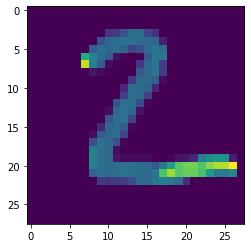

In [ ]:
#now tocheck that is our answer is correct or not
plt.imshow(x_test[1])

In [ ]:
print(np.argmax(predictions[100]))

6


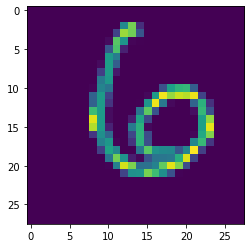

In [ ]:
plt.imshow(x_test[100])

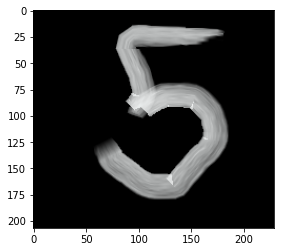

In [ ]:
import cv2 ##image input
img = cv2.imread('/content/five1.png')
plt.imshow(img)



In [ ]:
img.shape

(207, 229, 3)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

(207, 229)

In [ ]:
resized = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)

In [ ]:
resized.shape

(28, 28)

In [ ]:
newimg = tf.keras.utils.normalize(resized,axis=1) # 0 to 1 scaling

In [ ]:
newimg = np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1) #kernaloperation of convolutional layer

In [ ]:
newimg.shape

(1, 28, 28, 1)

In [ ]:
predictions = model.predict(newimg)

In [ ]:
print(np.argmax(predictions))

5
